In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import MuC.detgeo as dg
from MuC import collider_tools as col
from MuC import detector_tools as det
from MuC import plot_tools as pt

from MuC.detgeo import SimulateDetector

In [4]:
import MuC
from MuC.detector_geometries import det_v2

In [5]:
design = dg.SimulateDetector(design=col.muc_10tev, N_evals = 1e4, save_mem=False)
sim = design.run()
with open(f'gen_data/MH_test_{design.design["short_name"]}.pkl', 'wb') as f:
    pickle.dump(sim, f)

MuC 10 TeV parameter set with 1.000e+04 evaluations .
1.792e+04 MC generations; took 0.528 s.
Simulating muon decays for nue
Simulating muon decays for numubar
Simulating muon decays for nuebar
Simulating muon decays for numu
Successfully simulated neutrino event rates within Det v2:
MuC 10 TeV ($\mu^+ \mu^-$) at L = 200.00 m.
Total count: 2.24e+11 events; took 5.45 s (numba pre-compilation needed).



In [11]:
NEVENTS = 1e5

# col_designs = [col.muc_3tev, col.muc_10tev, col.mut_2tev, col.mut_2tev_pol]
col_designs = [col.muc_1p5tev, col.muc_3tev, col.muc_10tev, col.muc_30tev, col.mut_2tev, col.mut_2tev_pol]
col_sims = []
for design in col_designs:
    sim = dg.SimulateDetector(design=design, N_evals = NEVENTS, save_mem=False)
    col_sims.append(sim.run())

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.876e+05 MC generations; took 3.07 s.
Simulating muon decays for nue
Simulating muon decays for numubar
Simulating muon decays for nuebar
Simulating muon decays for numu
Successfully simulated neutrino event rates within Det v2:
MuC 1.5 TeV ($\mu^+ \mu^-$) at L = 50.00 m.
Total count: 2.90e+11 events; took 5.67 s (numba pre-compilation needed).

MuC 3 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 3.09 s.
Simulating muon decays for nue
Simulating muon decays for numubar
Simulating muon decays for nuebar
Simulating muon decays for numu
Successfully simulated neutrino event rates within Det v2:
MuC 3 TeV ($\mu^+ \mu^-$) at L = 200.00 m.
Total count: 2.20e+11 events; took 0.887 s.

MuC 10 TeV parameter set with 1.000e+05 evaluations .
1.876e+05 MC generations; took 3.06 s.
Simulating muon decays for nue
Simulating muon decays for numubar
Simulating muon decays for nuebar
Simulating muon decays for numu


## Saving simulations to file

In [12]:
version = 'MH_test'
for design, sim in zip(col_designs, col_sims):
    with open(f'gen_data/{version}_{design["short_name"]}.pkl', 'wb') as f:
        pickle.dump(sim, f)

Text(0.5, 1.0, 'Neutrino fractional energy')

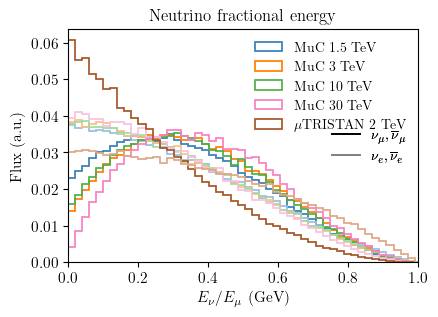

In [16]:
bins = np.linspace(0,2, 100)

light_factor = 0.5
LW=1.25

fig, ax = pt.std_fig()
def plot_curve(i):
    ax.hist(col_sims[i].cco.pnumu[:,0]/col_sims[i].design['beam_p0'], weights = col_sims[i].cco.weights, bins = bins, histtype = 'step', label = col_sims[i].design['name'], color = pt.cblind_safe_wheel[i], zorder = 2, lw=LW)
    ax.hist(col_sims[i].cco.pnue[:,0]/col_sims[i].design['beam_p0'], weights = col_sims[i].cco.weights, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[i],light_factor), zorder = 2, lw=LW)

plot_curve(0)
plot_curve(1)
plot_curve(2)
plot_curve(3)
plot_curve(4)

# standard legend
leg1 = ax.legend(loc = 'upper right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\nu_\mu,\overline\nu_\mu$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$\nu_e,\overline\nu_e$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center right')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$E_{\nu}/E_\mu$ (GeV)')
ax.set_ylabel(r'Flux (a.u.)')
# plt.xscale('log')
# ax.set_xlim(10,0.6*10**4)
ax.set_xlim(0,1)
ax.set_title(r'Neutrino fractional energy', fontsize = 12)
# plt.savefig('plots_Luc/posterplots/pl_e.jpg', bbox_inches = 'tight', dpi = 500)

In [19]:
def get_angle(p):
    # return np.arccos(p[:,-1]/np.linalg.norm(p[:,1:], axis = 1))
    return np.arccos(p[:,-1]/p[:,0])


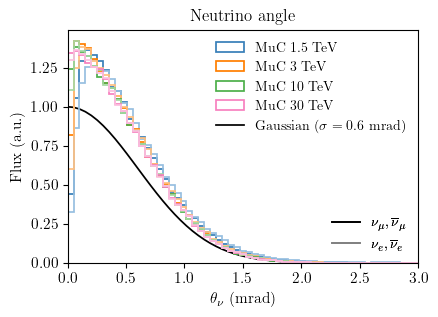

In [26]:
# bins = np.geomspace(1e-2,3, 100)
bins = np.linspace(0,3, 60)
light_factor = 0.5
LW=1.25
units = 1e3#180/np.pi
fig, ax = pt.std_fig()

kwargs = {'zorder': 2, 'lw': LW, 'histtype': 'step', 'bins': bins, 'cumulative': False, 'density': True}
def plot_curve(i):
    ax.hist(units*get_angle(col_sims[i].cco.pnumu), weights = col_sims[i].cco.weights, label = col_sims[i].design['name'], color = pt.cblind_safe_wheel[i], **kwargs)
    ax.hist(units*get_angle(col_sims[i].cco.pnue), weights = col_sims[i].cco.weights, color = pt.lighten_color(pt.cblind_safe_wheel[i],light_factor), **kwargs)

plot_curve(0)
plot_curve(1)
plot_curve(2)
plot_curve(3)
# plot_curve(4)

ax.plot(bins, np.exp(-bins**2/(2*(6e-4*units)**2)), label = 'Gaussian ($\sigma = 0.6$~mrad)', color = 'black', lw = LW, zorder = 1)
# standard legend
leg1 = ax.legend(loc = 'upper right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\nu_\mu,\overline\nu_\mu$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$\nu_e,\overline\nu_e$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='lower right')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$\theta_\nu$ (mrad)')
ax.set_ylabel(r'Flux (a.u.)')
# ax.set_xscale('log')
ax.set_xlim(bins.min(), bins.max())
ax.set_title(r'Neutrino angle', fontsize = 12)
plt.savefig('plots/paper_plots/neutrino_angle.jpg', bbox_inches = 'tight', dpi = 500)